# Youtube Playlist 크롤링
<br>

- Youtube의 주된 사용 목적 중 하나는 음악 감상이다. 하지만 간만에 재생 목록을 업데이트하다 보면 종종 이전에 추가해두었던 곡들이 삭제되거나 한국 ip로 볼 수 없는 영상이 되어 있는 경우를 마주치게 된다. 
- 실제로 그런 경우를 몇 번이나 경험하였기에 그를 대비해 곡 목록을 크롤링하여 저장해두려 한다. 
<br>
<br>

## 01. BeautifulSoup을 이용한 Playlist 크롤링
- 간단히 크롤링을 연습해보기 위해 16개의 노래 동영상이 등록된 짧은 Playlist를 가져와 보았다. 
- Youtube는 재생 목록이 '비공개'로 되어 있을 경우 크롤링을 할 수 없다! 크롤링을 할 때는 '공개' 설정이 되어 있는지 반드시 확인할 것.
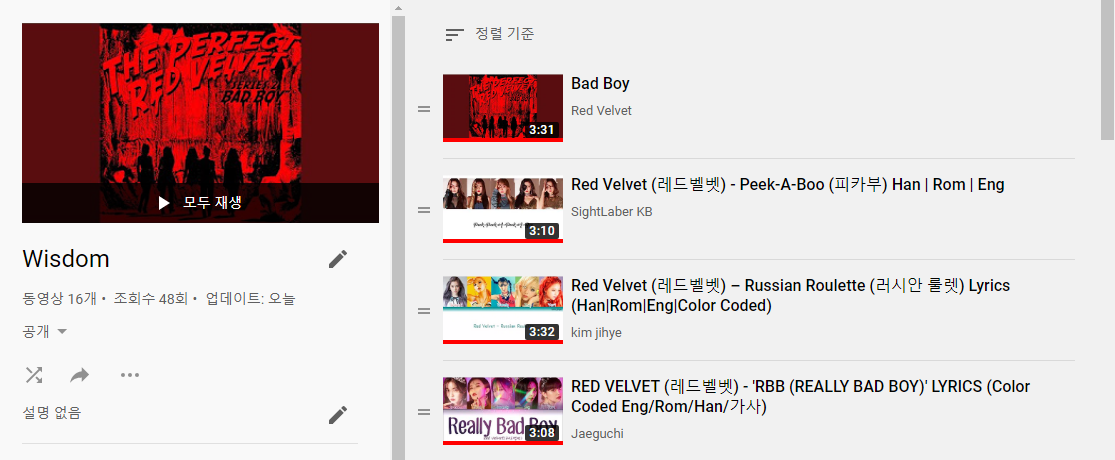


In [5]:
# 0. 라이브러리 불러오기
from bs4 import BeautifulSoup as bs
import urllib.request

# 1. url 분석(플레이리스트 페이지)
playlist_url = https://www.youtube.com/playlist?list=PLPKZ6FAxaaf8M_-QIZU5-V1Z-voU5oMOy
sample_url = https://www.youtube.com/watch?v=ulg69dvoQRs& 
            list=PLPKZ6FAxaaf8M_-QIZU5-V1Z-voU5oMOy& # Playlist에 부여된 고유코드 
            index=8& # Playlist 내 해당 곡의 index 
            t=0s 

In [24]:
# 2. 가장 간단한 크롤링
url = 'https://www.youtube.com/playlist?list=PLPKZ6FAxaaf8M_-QIZU5-V1Z-voU5oMOy'
html = urllib.request.urlopen(url)
response = html.read()
soup = bs(response)
# print(soup)
res = soup.find_all('a', {'class':'pl-video-title-link'})
title_list=[]
for t in res:
    title = t.get_text().replace('\n', '').strip()
    title_list.append(title)
    
print(title_list)

['Bad Boy', 'Red Velvet (레드벨벳) - Peek-A-Boo (피카부) Han | Rom | Eng', 'Red Velvet (레드벨벳) – Russian Roulette (러시안 룰렛) Lyrics (Han|Rom|Eng|Color Coded)', "RED VELVET (레드벨벳) - 'RBB (REALLY BAD BOY)' LYRICS (Color Coded Eng/Rom/Han/가사)", 'Red Velvet - Red Flavor (빨간 맛) (Color Coded Han|Rom|Eng Lyrics) | by Yankat', "SEVENTEEN - 'LIE AGAIN' (거짓말을 해) Lyrics [Color Coded_Han_Rom_Eng]", 'SEVENTEEN (세븐틴) - Getting Closer (숨이 차) (Color Coded Lyrics Eng/Rom/Han/가사)', 'AB6IX (에이비식스) - Breathe (Han|Rom|Eng) Color Coded Lyrics/한국어 가사', 'GiiANA - Bad Trip (Feat. B JYUN.)', 'plan8  -  fndu', 'June One - $urfer Boy', 'June One - Enemies', 'Cherry Coke - Salt', 'June One - Faded', 'Cherry Coke - 목욕해(Wash) [Music Video]', "Cherry Coke - Don't Kill My Vibe 가사해석"]


In [27]:
# 3. 출력 리스트 확인
for s in title_list:
    print('곡명 :', s)
    
print('해당 플레이리스트의 곡 개수 :', len(title_list))

곡명 : Bad Boy
곡명 : Red Velvet (레드벨벳) - Peek-A-Boo (피카부) Han | Rom | Eng
곡명 : Red Velvet (레드벨벳) – Russian Roulette (러시안 룰렛) Lyrics (Han|Rom|Eng|Color Coded)
곡명 : RED VELVET (레드벨벳) - 'RBB (REALLY BAD BOY)' LYRICS (Color Coded Eng/Rom/Han/가사)
곡명 : Red Velvet - Red Flavor (빨간 맛) (Color Coded Han|Rom|Eng Lyrics) | by Yankat
곡명 : SEVENTEEN - 'LIE AGAIN' (거짓말을 해) Lyrics [Color Coded_Han_Rom_Eng]
곡명 : SEVENTEEN (세븐틴) - Getting Closer (숨이 차) (Color Coded Lyrics Eng/Rom/Han/가사)
곡명 : AB6IX (에이비식스) - Breathe (Han|Rom|Eng) Color Coded Lyrics/한국어 가사
곡명 : GiiANA - Bad Trip (Feat. B JYUN.)
곡명 : plan8  -  fndu
곡명 : June One - $urfer Boy
곡명 : June One - Enemies
곡명 : Cherry Coke - Salt
곡명 : June One - Faded
곡명 : Cherry Coke - 목욕해(Wash) [Music Video]
곡명 : Cherry Coke - Don't Kill My Vibe 가사해석
해당 플레이리스트의 곡 개수 : 16


In [29]:
# 4. 200곡 이상의 긴 playlist 크롤링
url = 'https://www.youtube.com/playlist?list=PLPKZ6FAxaaf-G07LCVMNdC1gCQefy9wq9' # 전체 곡 개수: 278
html = urllib.request.urlopen(url)
response = html.read()
soup = bs(response)
# print(soup)
res = soup.find_all('a', {'class':'pl-video-title-link'})
title_list=[]
for t in res:
    title = t.get_text().replace('\n', '').strip() # '필요없는 문자와 공백 제거
    title_list.append(title)
    
print(title_list)

['Standing EGG - 그 자리에 있어', '무감각 (Mugamgak) - 처음이었지 (First Time in Love)', '에피톤 프로젝트   나는 그사람이 아프다', '스웨덴세탁소 - 우리가 있던 시간', 'RAYE ft. Maleek Berry, Nana Rogues - Confidence (Official Video)', 'Dept(뎁트) - snowy road (눈길) (feat. Chaanill , amin)', 'Lovewave - 그 밤 (The Night)', 'DAWN - fairy', 'DAWN - phobia', 'Catchup - LOCK (feat. B JYUN.)', 'WTHR. - Know.', 'Berhana - Health Food', 'DAUM (Feat. Colde)', '《抖音热歌》青花瓷《戏曲版》-当戏腔遇上流行音乐', 'Arcadia', 'Cherry Coke - Blind (Official Audio)', 'Cherry Coke - Salt', 'Jimmy Brown - Take Me Away', 'jaguaa - Seaside Farewell (prod. rrarebear)', 'June One - Faded', 'June One - Enemies', 'June One - $urfer Boy', 'G.reedy (그리디) - Foolish', 'GiiANA - Bad Trip (Feat. B JYUN.)', 'Jword  - Notice (feat. Jimmy Brown)', 'Devenity Perkins - Jekyll & Hyde Feat. Suigeneris', 'Colde (콜드) - 향', 'Jimmy Brown - 따뜻한 물', 'Colde (콜드) - 와르르 ♥', 'Jimmy Brown - 천천히 (Feat. Sunham)', 'Can I Love ? (Feat. 유라) (youra) (, Meego)', 'Jeremy Zucker - all the kids are depressed (Audi

In [30]:
# 5. 출력 리스트, 길이 확인
for s in title_list:
    print('곡명 :', s)
    
print('해당 플레이리스트의 곡 개수 :', len(title_list)) # 278곡에서 100곡만 크롤링됨

곡명 : Standing EGG - 그 자리에 있어
곡명 : 무감각 (Mugamgak) - 처음이었지 (First Time in Love)
곡명 : 에피톤 프로젝트   나는 그사람이 아프다
곡명 : 스웨덴세탁소 - 우리가 있던 시간
곡명 : RAYE ft. Maleek Berry, Nana Rogues - Confidence (Official Video)
곡명 : Dept(뎁트) - snowy road (눈길) (feat. Chaanill , amin)
곡명 : Lovewave - 그 밤 (The Night)
곡명 : DAWN - fairy
곡명 : DAWN - phobia
곡명 : Catchup - LOCK (feat. B JYUN.)
곡명 : WTHR. - Know.
곡명 : Berhana - Health Food
곡명 : DAUM (Feat. Colde)
곡명 : 《抖音热歌》青花瓷《戏曲版》-当戏腔遇上流行音乐
곡명 : Arcadia
곡명 : Cherry Coke - Blind (Official Audio)
곡명 : Cherry Coke - Salt
곡명 : Jimmy Brown - Take Me Away
곡명 : jaguaa - Seaside Farewell (prod. rrarebear)
곡명 : June One - Faded
곡명 : June One - Enemies
곡명 : June One - $urfer Boy
곡명 : G.reedy (그리디) - Foolish
곡명 : GiiANA - Bad Trip (Feat. B JYUN.)
곡명 : Jword  - Notice (feat. Jimmy Brown)
곡명 : Devenity Perkins - Jekyll & Hyde Feat. Suigeneris
곡명 : Colde (콜드) - 향
곡명 : Jimmy Brown - 따뜻한 물
곡명 : Colde (콜드) - 와르르 ♥
곡명 : Jimmy Brown - 천천히 (Feat. Sunham)
곡명 : Can I Love ? (Feat. 유라) (youra

In [31]:
# 6. 스크롤을 끝까지 내린 후 다시 크롤링
url = 'https://www.youtube.com/playlist?list=PLPKZ6FAxaaf-G07LCVMNdC1gCQefy9wq9' 
html = urllib.request.urlopen(url)
response = html.read()
soup = bs(response)
# print(soup)
res = soup.find_all('a', {'class':'pl-video-title-link'})
title_list=[]
for t in res:
    title = t.get_text().replace('\n', '').strip() # '필요없는 문자와 공백 제거
    title_list.append(title)
    
for s in title_list:
    print('곡명 :', s)
    
print('해당 플레이리스트의 곡 개수 :', len(title_list)) # 변화 없음

곡명 : Standing EGG - 그 자리에 있어
곡명 : 무감각 (Mugamgak) - 처음이었지 (First Time in Love)
곡명 : 에피톤 프로젝트   나는 그사람이 아프다
곡명 : 스웨덴세탁소 - 우리가 있던 시간
곡명 : RAYE ft. Maleek Berry, Nana Rogues - Confidence (Official Video)
곡명 : Dept(뎁트) - snowy road (눈길) (feat. Chaanill , amin)
곡명 : Lovewave - 그 밤 (The Night)
곡명 : DAWN - fairy
곡명 : DAWN - phobia
곡명 : Catchup - LOCK (feat. B JYUN.)
곡명 : WTHR. - Know.
곡명 : Berhana - Health Food
곡명 : DAUM (Feat. Colde)
곡명 : 《抖音热歌》青花瓷《戏曲版》-当戏腔遇上流行音乐
곡명 : Arcadia
곡명 : Cherry Coke - Blind (Official Audio)
곡명 : Cherry Coke - Salt
곡명 : Jimmy Brown - Take Me Away
곡명 : jaguaa - Seaside Farewell (prod. rrarebear)
곡명 : June One - Faded
곡명 : June One - Enemies
곡명 : June One - $urfer Boy
곡명 : G.reedy (그리디) - Foolish
곡명 : GiiANA - Bad Trip (Feat. B JYUN.)
곡명 : Jword  - Notice (feat. Jimmy Brown)
곡명 : Devenity Perkins - Jekyll & Hyde Feat. Suigeneris
곡명 : Colde (콜드) - 향
곡명 : Jimmy Brown - 따뜻한 물
곡명 : Colde (콜드) - 와르르 ♥
곡명 : Jimmy Brown - 천천히 (Feat. Sunham)
곡명 : Can I Love ? (Feat. 유라) (youra